# Importing Necessary Libraries

In [2]:
# importing zipfile module
from zipfile import ZipFile
## import pandas
import pandas as pd
## For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="darkgrid")

## Import numpy
import numpy as np

In [3]:
np.random.seed(7)

# Load WDI Dataset

First we download WDI dataset in CSV format from https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

The file downloaded is WDI_CSV.zip, so first we will extract it

In [4]:
## Extracting the Dataset

with ZipFile("WDI_CSV.zip", "r") as zip:
  zip.extractall("WDI_CSV")

Now let's load data from ```WDICSV.csv```

In [5]:
df = pd.read_csv("WDI_CSV/WDICSV.csv")

In [6]:
## View data set snapshot
df.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.401410,17.911234,18.463874,18.924037,19.437054,20.026254,20.647969,21.165877,21.863139,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.728819,7.005877,7.308571,7.547226,7.875917,8.243018,8.545483,8.906711,9.261320,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.080931,38.422282,38.722108,38.993157,39.337872,39.695279,40.137847,40.522209,41.011132,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.619475,16.500171,24.605861,25.396929,27.037528,29.137914,31.001049,32.777910,33.747907,NaN


# Preprocessing the Data

In [7]:
## View data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396872 entries, 0 to 396871
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    396872 non-null  object 
 1   Country Code    396872 non-null  object 
 2   Indicator Name  396872 non-null  object 
 3   Indicator Code  396872 non-null  object 
 4   1960            38940 non-null   float64
 5   1961            44298 non-null   float64
 6   1962            45591 non-null   float64
 7   1963            46526 non-null   float64
 8   1964            47091 non-null   float64
 9   1965            49248 non-null   float64
 10  1966            49243 non-null   float64
 11  1967            49922 non-null   float64
 12  1968            50537 non-null   float64
 13  1969            51305 non-null   float64
 14  1970            68892 non-null   float64
 15  1971            75803 non-null   float64
 16  1972            77552 non-null   float64
 17  1973      

In [8]:
## As a preprocessing step let's drop duplicates

df.drop_duplicates(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396872 entries, 0 to 396871
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    396872 non-null  object 
 1   Country Code    396872 non-null  object 
 2   Indicator Name  396872 non-null  object 
 3   Indicator Code  396872 non-null  object 
 4   1960            38940 non-null   float64
 5   1961            44298 non-null   float64
 6   1962            45591 non-null   float64
 7   1963            46526 non-null   float64
 8   1964            47091 non-null   float64
 9   1965            49248 non-null   float64
 10  1966            49243 non-null   float64
 11  1967            49922 non-null   float64
 12  1968            50537 non-null   float64
 13  1969            51305 non-null   float64
 14  1970            68892 non-null   float64
 15  1971            75803 non-null   float64
 16  1972            77552 non-null   float64
 17  1973      

# Data Exploration and Visualisation

1. Let's pick a few indicators and visualize them by countries and years

## Indicator 1: Access to clean fuels and technologies for cooking (% of population)

So , first let's see how many unique Indicators are there in the dataset

In [10]:
unique_indicators = df["Indicator Name"].unique()
print("Number of Unique Indicators: %d"%(len(unique_indicators)))

Number of Unique Indicators: 1492


In [11]:
## Let's pick the first one

indicator_1 = unique_indicators[0]
print(indicator_1)

Access to clean fuels and technologies for cooking (% of population)


As we can see that this indicator shows countries and years where % of population have access to clean fuel and technologies

In [12]:
## Get data with Indicator 1
df_indicator1 = df[df["Indicator Name"] == indicator_1]

In [13]:
df_indicator1.shape

(266, 68)

In [14]:
## Convert data from wide format to long format

df_indicator1 = df_indicator1.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='value')

In [15]:
df_indicator1.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,year,value
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
1,Africa Western and Central,AFW,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Caribbean small states,CSS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
4,Central Europe and the Baltics,CEB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN


### Line Chart: Trend of Indicator 1 for group of countries

For countries: ["Arab World", "Bhutan", "India", "China", "United States"]

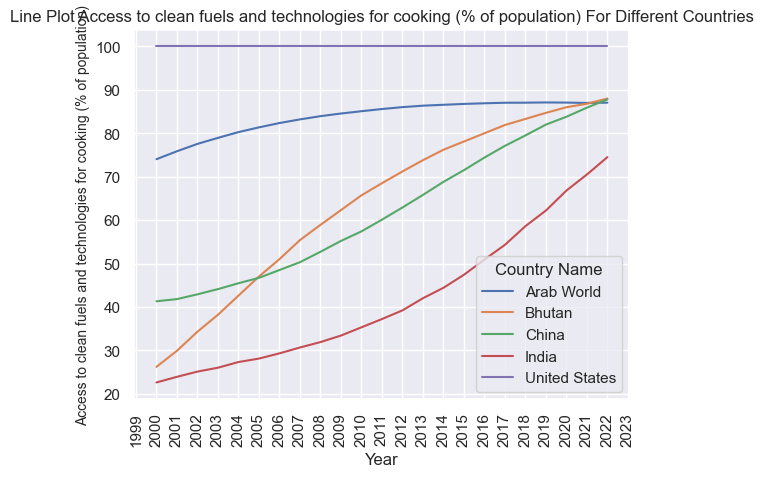

In [16]:
## Plot Data for ["Arab World", "Bhutan", "India", "China", "United States"]
line_plot = sns.lineplot(df_indicator1[df_indicator1["Country Name"].isin(["Arab World", "Bhutan", "India", "China", "United States"])], x= 'year', y= 'value', hue = "Country Name")
line_plot.set_xlabel("Year")
line_plot.set_ylabel(indicator_1, fontsize=10, wrap=True)
line_plot.set_title("Line Plot " + str(indicator_1) + " For Different Countries",wrap=True)
plt.xticks(rotation=90)
plt.show()

We can observe the following from this graph:-

1. There is no data before 2000
2. United states maintains 100% Access to clean fuels and technologies for cooking
3. India has seen quick growth throughout the years but still remains last in this indicator
4. Bhutan overtoom China in 2005

### Bar Chart: Compare the indicator 1 values between different countries in a particular year


#### For Year 2005

let's first consider the 5 contries we saw above

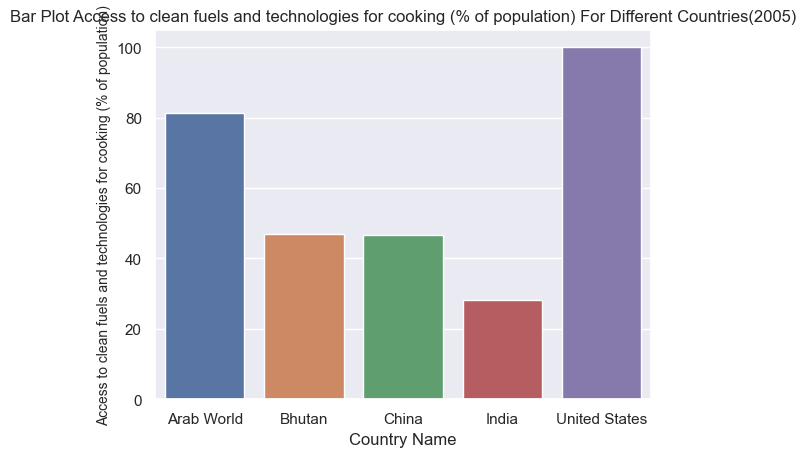

In [17]:
## Countries = ["Arab World", "Bhutan", "India", "China", "United States"]
data = df_indicator1[df_indicator1["year"] == '2005']
colors = ['#8da0cb', '#a6d854', '#fc8d62', '#66c2a5', '#ffd92f']
bar_plot = sns.barplot(data[data['Country Name'].isin(["Arab World", "Bhutan", "India", "China", "United States"])], x="Country Name", y="value", hue = "Country Name")
bar_plot.set_ylabel(indicator_1, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_1) + " For Different Countries(2005)",wrap=True)
plt.show()

Now let's pick 10 countries randomly

In [18]:
random_countries = np.random.choice(df_indicator1["Country Name"].unique(), size=10, replace=False)
print(random_countries)

['Chile' 'South Africa' 'Arab World' 'Romania' 'Uganda' 'Bermuda'
 'Ethiopia' 'Late-demographic dividend' 'Belarus' 'Faroe Islands']


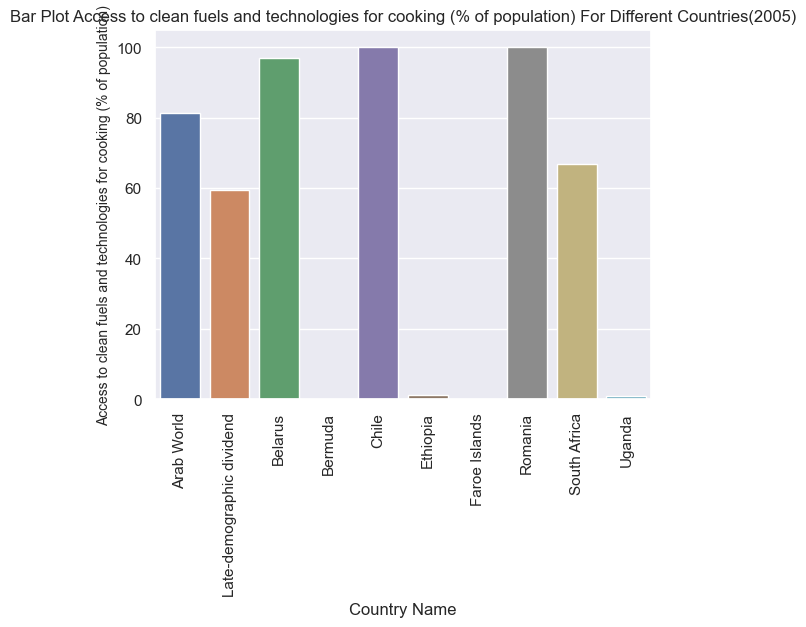

In [19]:
## Plot bar for these

data = df_indicator1[df_indicator1["year"] == '2005']
bar_plot = sns.barplot(data[data['Country Name'].isin(random_countries)], x="Country Name", y="value", hue = "Country Name")
bar_plot.set_ylabel(indicator_1, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_1) + " For Different Countries(2005)",wrap=True)
plt.xticks(rotation=90)
plt.show()


#### For Year 2020

let's first consider the 5 contries we saw above

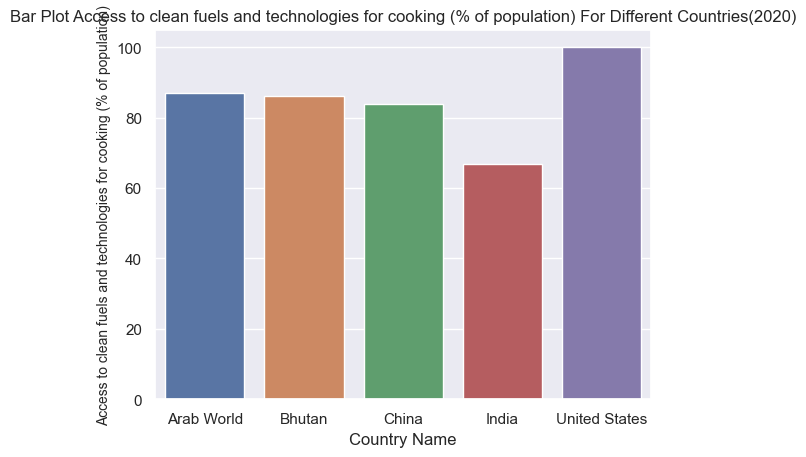

In [20]:
## Countries = ["Arab World", "Bhutan", "India", "China", "United States"]
data = df_indicator1[df_indicator1["year"] == '2020']
bar_plot = sns.barplot(data[data['Country Name'].isin(["Arab World", "Bhutan", "India", "China", "United States"])], x="Country Name", y="value", hue = "Country Name")
bar_plot.set_ylabel(indicator_1, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_1) + " For Different Countries(2020)",wrap=True)
plt.show()

For random countries above

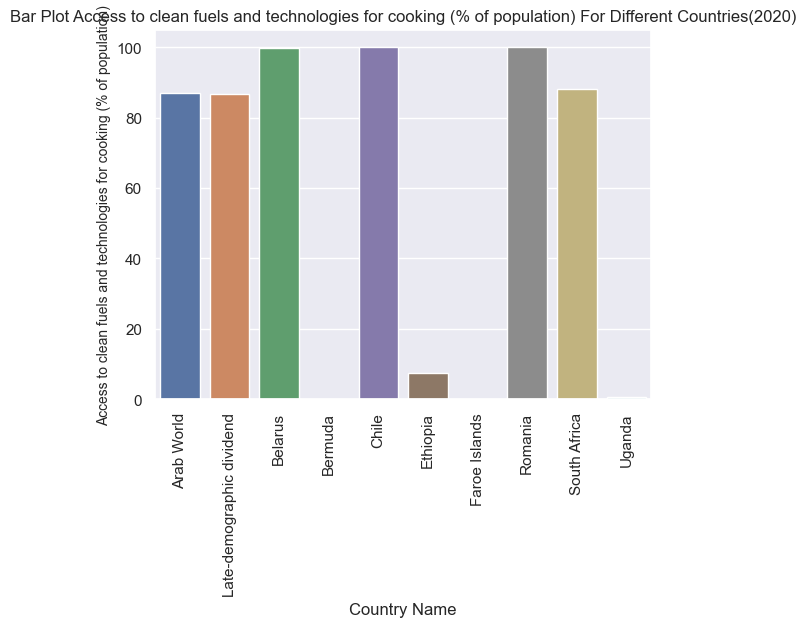

In [21]:
## Plot bar for these

bar_plot = sns.barplot(data[data['Country Name'].isin(random_countries)], x="Country Name", y="value", hue = "Country Name")
bar_plot.set_ylabel(indicator_1, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_1) + " For Different Countries(2020)",wrap=True)
plt.xticks(rotation=90)
plt.show()


### Heatmap: Indicator 1 accross different countries and years

[]

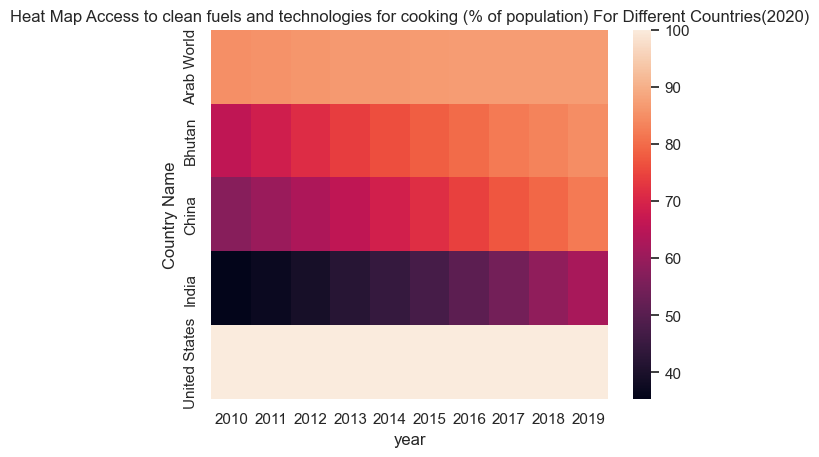

In [22]:
## Pick 5 countries we consodered
data = df_indicator1[df_indicator1["year"].isin(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])]
data = data[data['Country Name'].isin(["Arab World", "Bhutan", "India", "China", "United States"])]
data_pivot = data.pivot(index="Country Name", columns="year", values="value")
heat_map = sns.heatmap(data_pivot)
heat_map.set_title("Heat Map " + str(indicator_1) + " For Different Countries(2020)",wrap=True)
plt.plot()

## Indicator 2: Access to clean fuels and technologies for cooking (% of population)

So , first let's see how many unique Indicators are there in the dataset

In [23]:
## Let's pick the another

indicator_2 = "GDP (current US$)"
print(indicator_2)

GDP (current US$)


As we can see that this indicator shows GDP in US$

In [24]:
## Get data with Indicator 2
df_indicator2 = df[df["Indicator Name"] == indicator_2]

In [25]:
df_indicator2.shape

(266, 68)

In [26]:
## Convert data from wide format to long format

df_indicator2 = df_indicator2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='value')

In [27]:
df_indicator2.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,year,value
0,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1960,2.121696e+10
1,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.188413e+10
2,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Caribbean small states,CSS,GDP (current US$),NY.GDP.MKTP.CD,1960,6.415392e+08
4,Central Europe and the Baltics,CEB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN


### Line Chart: Trend of Indicator 2 for group of countries

For countries: ["Arab World", "Thailand", "India", "China", "United States"]

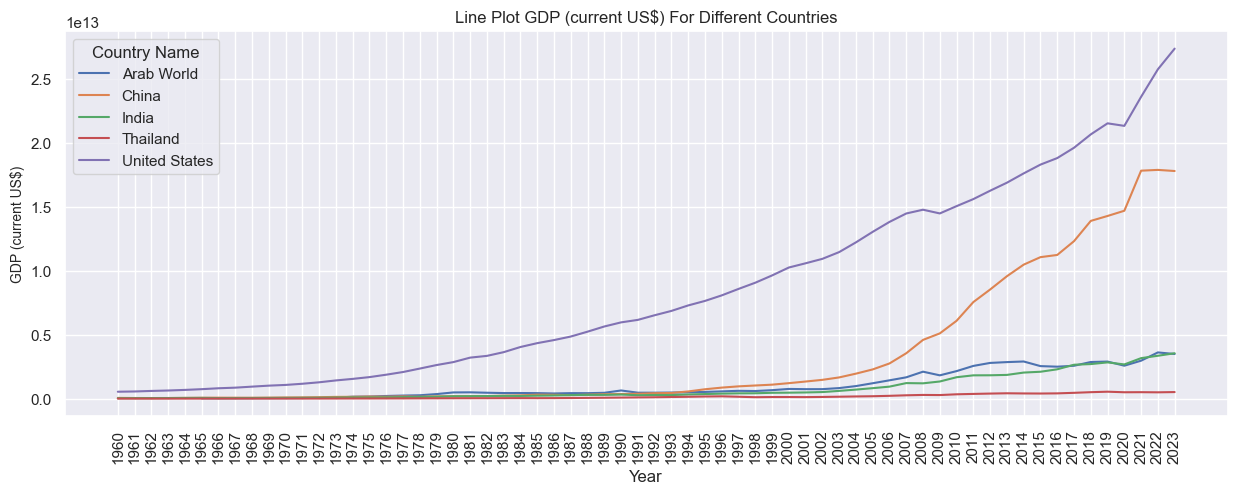

In [28]:
## Plot Data for ["Arab World", "Thailand", "India", "China", "United States"]
sns.set(rc={'figure.figsize':(15,5)})
line_plot = sns.lineplot(df_indicator2[df_indicator2["Country Name"].isin(["Arab World", "Thailand", "India", "China", "United States"])], x= 'year', y= 'value', hue = "Country Name")
line_plot.set_xlabel("Year")
line_plot.set_ylabel(indicator_2, fontsize=10, wrap=True)
line_plot.set_title("Line Plot " + str(indicator_2) + " For Different Countries",wrap=True)
plt.xticks(rotation=90)
plt.show()

We can observe the following from this graph:-

1. United states maintains the highest GDP
2. China's GDP has grown very drastically from 2000 to 2021
3. India's GDP overtook Arab World's GDP recently in 2020

### Bar Chart: Compare the indicator 2 values between different countries in a particular year


#### For Year 2009

let's first consider the 5 contries we saw above

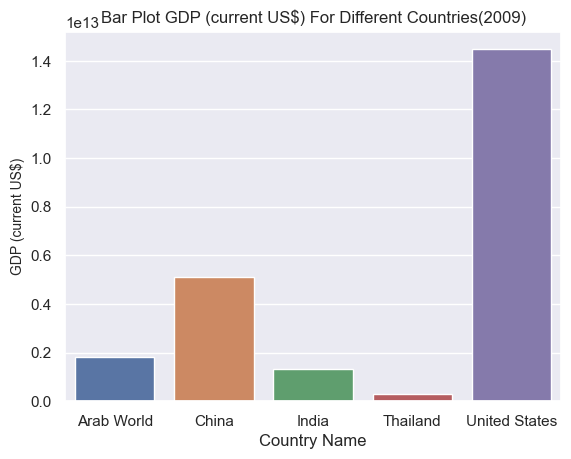

In [29]:
## Countries = ["Arab World", "Thailand", "India", "China", "United States"]
sns.set(rc={'figure.figsize':(6.4,4.8)})
data = df_indicator2[df_indicator2["year"] == '2009']
bar_plot = sns.barplot(data[data['Country Name'].isin(["Arab World", "Thailand", "India", "China", "United States"])], x="Country Name", y="value", hue = "Country Name")
bar_plot.set_ylabel(indicator_2, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_2) + " For Different Countries(2009)",wrap=True)
plt.show()

Now let's pick 10 countries randomly

In [30]:
random_countries = np.random.choice(df_indicator1["Country Name"].unique(), size=10, replace=False)
print(random_countries)

['Paraguay' 'Uzbekistan' 'South Sudan' 'Czechia' 'Venezuela, RB'
 'Northern Mariana Islands' 'St. Martin (French part)'
 'Caribbean small states' 'Low & middle income' 'Gabon']


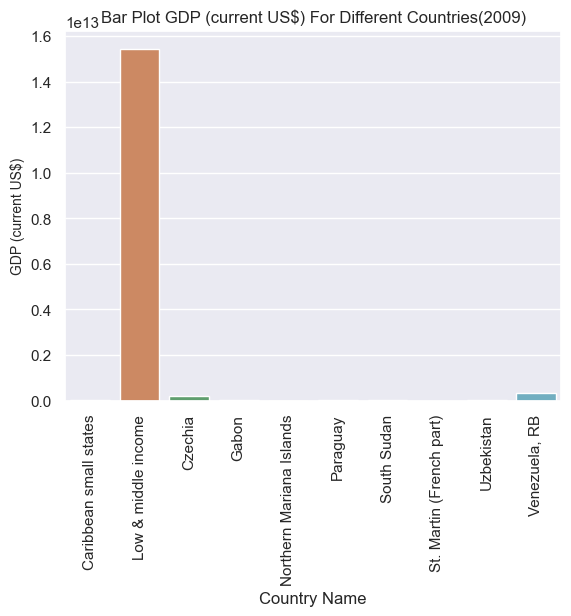

In [31]:
## Plot bar for these

data = df_indicator2[df_indicator2["year"] == '2009']
bar_plot = sns.barplot(data[data['Country Name'].isin(random_countries)], x="Country Name", y="value", hue="Country Name")
bar_plot.set_ylabel(indicator_2, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_2) + " For Different Countries(2009)",wrap=True)
plt.xticks(rotation=90)
plt.show()


#### For Year 2020

let's first consider the 5 contries we saw above

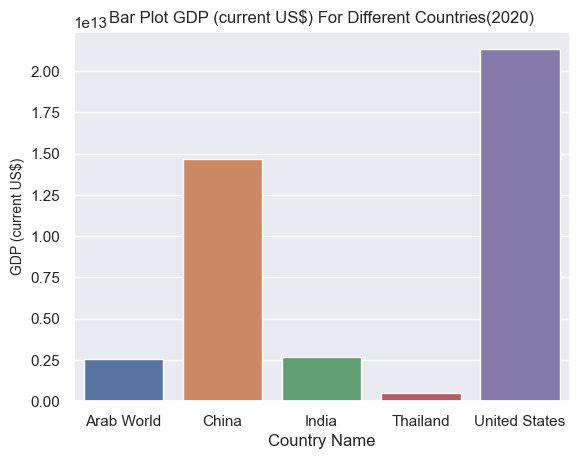

In [32]:
## Countries = ["Arab World", "Thailand", "India", "China", "United States"]
data = df_indicator2[df_indicator2["year"] == '2020']
bar_plot = sns.barplot(data[data['Country Name'].isin(["Arab World", "Thailand", "India", "China", "United States"])], x="Country Name", y="value", hue = "Country Name")
bar_plot.set_ylabel(indicator_2, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_2) + " For Different Countries(2020)",wrap=True)
plt.show()

For random countries above

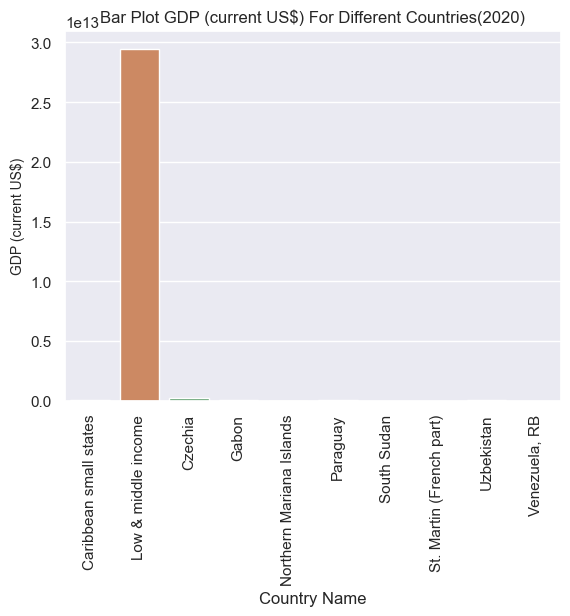

In [33]:
## Plot bar for these

bar_plot = sns.barplot(data[data['Country Name'].isin(random_countries)], x="Country Name", y="value", hue = "Country Name")
bar_plot.set_ylabel(indicator_2, fontsize=10, wrap=True)
bar_plot.set_title("Bar Plot " + str(indicator_2) + " For Different Countries(2020)",wrap=True)
plt.xticks(rotation=90)
plt.show()


### Heatmap: Indicator 2 accross different countries and years

/var/folders/sk/h3tz1mr55_jfrk4d1x9p8g3r0000gn/T/ipykernel_88974/2782812397.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_pivot = data.pivot("Country Name", "year", "value")


[]

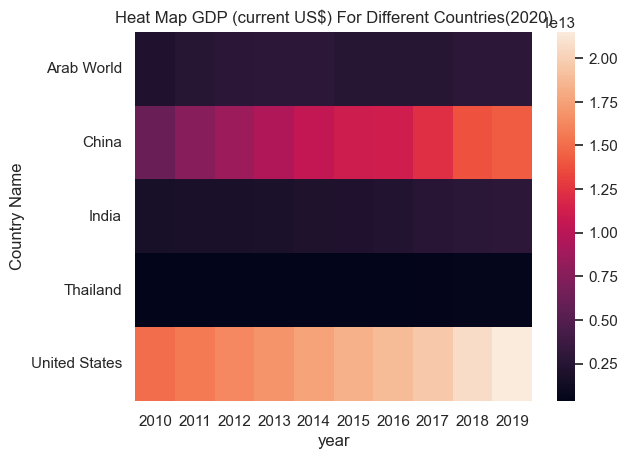

In [34]:
## Pick 5 countries we consodered
data = df_indicator2[df_indicator2["year"].isin(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])]
data = data[data['Country Name'].isin(["Arab World", "Thailand", "India", "China", "United States"])]
data_pivot = data.pivot("Country Name", "year", "value")
heat_map = sns.heatmap(data_pivot)
heat_map.set_title("Heat Map " + str(indicator_2) + " For Different Countries(2020)",wrap=True)
plt.plot()

2. Now let's view a stacked bar plot of variation of various Indicators of various countries for a particular year

## Grouped Bar: Different Indicators

We already have 2 indicators that we viewed, let's pick 2 more

In [35]:
print(indicator_1)
print(indicator_2)

Access to clean fuels and technologies for cooking (% of population)
GDP (current US$)


In [36]:
## Let's look for a indicator of life expectancy
for ind in unique_indicators:
  if("Life" in ind):
    print(ind)

Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth, total (years)
Lifetime risk of maternal death (%)
Lifetime risk of maternal death (1 in: rate varies by country)


In [37]:
## Lets consider Life expectancy at birth, total (years)
indicator_3 = "Life expectancy at birth, total (years)"

In [38]:
## Let's look for Human capital index(HCI) since that is an important indicator of knowlegde and health
for ind in unique_indicators:
  if("Human" in ind):
    print(ind)

Human capital index (HCI) (scale 0-1)
Human capital index (HCI), female (scale 0-1)
Human capital index (HCI), female, lower bound (scale 0-1)
Human capital index (HCI), female, upper bound (scale 0-1)
Human capital index (HCI), lower bound (scale 0-1)
Human capital index (HCI), male (scale 0-1)
Human capital index (HCI), male, lower bound (scale 0-1)
Human capital index (HCI), male, upper bound (scale 0-1)
Human capital index (HCI), upper bound (scale 0-1)


In [39]:
## Indicator 4:-

indicator_4 = "Human capital index (HCI) (scale 0-1)"

In [40]:
## Filter these indicators

df_indicators = df[df["Indicator Name"].isin([indicator_1, indicator_2, indicator_3, indicator_4])]

In [41]:
print(df_indicators.shape)

(1064, 68)


In [42]:
df_indicators.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.740141e+01,1.791123e+01,1.846387e+01,1.892404e+01,1.943705e+01,2.002625e+01,2.064797e+01,2.116588e+01,2.186314e+01,NaN
475,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,9.796897e+11,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12
584,Africa Eastern and Southern,AFE,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,4.408555e+01,4.438670e+01,4.475218e+01,4.491316e+01,4.547904e+01,4.549834e+01,...,6.133792e+01,6.185646e+01,6.244405e+01,6.292239e+01,6.336586e+01,6.375568e+01,6.331386e+01,6.245459e+01,6.289903e+01,NaN
1492,Africa Western and Central,AFW,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.111906e+00,1.008489e+01,1.128244e+01,1.279326e+01,1.466358e+01,1.665211e+01,1.871414e+01,2.067196e+01,2.231940e+01,NaN


In [43]:
## Convert data from wide format to long format

df_indicators = df_indicators.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='value')

In [44]:
df_indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,value
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1960,2.121696e+10
2,Africa Eastern and Southern,AFE,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,1960,NaN
3,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,4.408555e+01
4,Africa Western and Central,AFW,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN


In [45]:
len(df_indicators["Country Name"].unique())

266

#### For year 2010

For the countries

Countries = ["Arab World", "Thailand", "India", "China", "United States"]

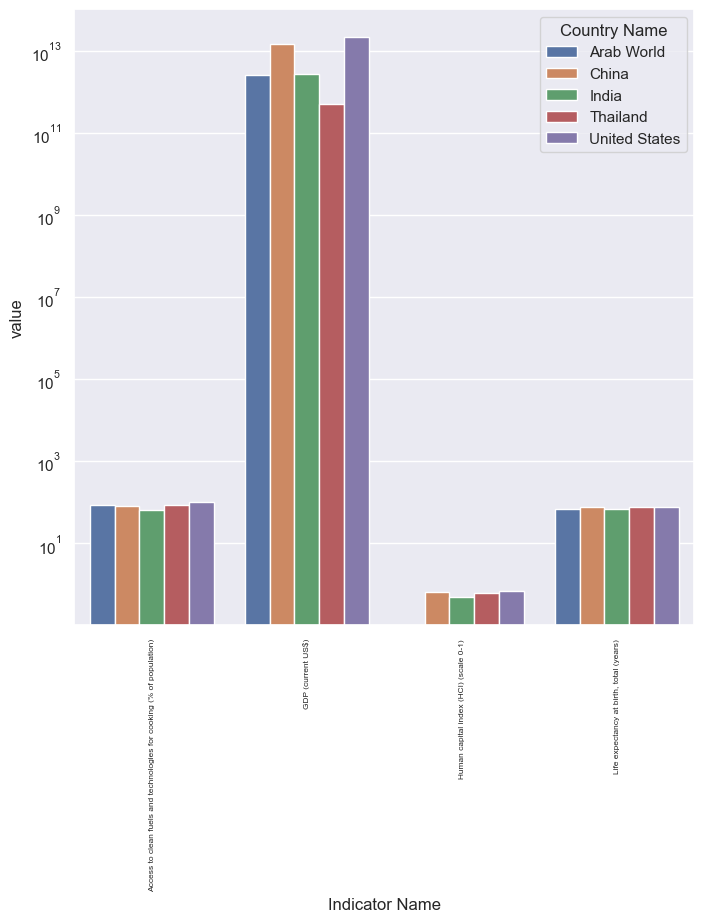

In [46]:
## Countries = ["Arab World", "Thailand", "India", "China", "United States"]
## Plot group bars
sns.set(rc={'figure.figsize':(8,8)})
data = df_indicators[df_indicators["year"] == '2020']
## Get Grouped Bar

group = sns.barplot(data[data['Country Name'].isin(["Arab World", "Thailand", "India", "China", "United States"])], x="Indicator Name",y="value", hue="Country Name")
## Set Log Scale to scale values
group.set_yscale("log")
plt.xticks(rotation=90,fontsize=6)
plt.show()


There are several other visualizations that can be done but for now let's stop here